## Light GBM（前処理：One-Hot-Encoding）

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

%matplotlib inline

In [82]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
PassengerId = test['PassengerId']

In [86]:
y = train['Survived']
train = train[[col for col in train.columns if col != 'Survived']]

print(train.shape)
print(test.shape)

(891, 11)
(418, 11)


In [87]:
X = pd.concat([train, test], axis=0)

print(X.shape)
X.head()

(1309, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
X.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [90]:
def code_transform(x):

    if x == 'male':
        y = 0
    else:
        y = 1

    return y

X['Sex'] = X['Sex'].apply(lambda x: code_transform(x))
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [91]:
def code_transform(x):

    if x == 'C':
        y = 0
    elif x == 'Q':
        y = 1
    else:
        y = 2

    return y

X['Embarked'] = X['Embarked'].apply(lambda x: code_transform(x))
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [92]:
numerical_col = [col for col in X.columns if X[col].dtype != 'object']
categorical_col = [col for col in X.columns if X[col].dtype == 'object']

print(numerical_col)
print(categorical_col)

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
['Name', 'Ticket', 'Cabin']


In [93]:
X_num = X[numerical_col]
X_cat = X[categorical_col]

print(X_num.shape)
print(X_cat.shape)

(1309, 8)
(1309, 3)


In [94]:
X_num.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,2
1,2,1,1,38.0,1,0,71.2833,0
2,3,3,1,26.0,0,0,7.9250,2
3,4,1,1,35.0,1,0,53.1000,2
4,5,3,0,35.0,0,0,8.0500,2


In [95]:
X_num.fillna(X_num.median(), inplace=True)

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [96]:
X_num.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [97]:
X_cat.head()

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,NaN


In [98]:
X_cat.fillna(value='missing', inplace=True)

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [99]:
X_cat.isnull().sum()

Name      0
Ticket    0
Cabin     0
dtype: int64

In [100]:
print(X_num.columns)
print(X_cat.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Index(['Name', 'Ticket', 'Cabin'], dtype='object')


In [101]:
X_cat = pd.get_dummies(X_cat)
X_cat.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_cat.columns]

print(X_cat.shape)
X_cat.head()

(1309, 2423)


,Name_Abbing__Mr__Anthony,Name_Abbott__Master__Eugene_Joseph,Name_Abbott__Mr__Rossmore_Edward,Name_Abbott__Mrs__Stanton__Rosa_Hunt_,Name_Abelseth__Miss__Karen_Marie,Name_Abelseth__Mr__Olaus_Jorgensen,Name_Abelson__Mr__Samuel,Name_Abelson__Mrs__Samuel__Hannah_Wizosky_,Name_Abrahamsson__Mr__Abraham_August_Johannes,Name_Abrahim__Mrs__Joseph__Sophie_Halaut_Easu_,...,Cabin_F_E69,Cabin_F_G63,Cabin_F_G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_missing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
X_total = pd.concat([X_num, X_cat], axis=1)

print(X_total.shape)
X_total.head()

(1309, 2431)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Abbing__Mr__Anthony,Name_Abbott__Master__Eugene_Joseph,...,Cabin_F_E69,Cabin_F_G63,Cabin_F_G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_missing
0,1,3,0,22.0,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,1,26.0,0,0,7.9250,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,0,35.0,0,0,8.0500,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
train_rows = train.shape[0]
X = X_total[:train_rows]

std = StandardScaler()
X = std.fit_transform(X)

print(X.shape)
print(y.shape)

(891, 2431)
(891,)


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 2431)
(623,)
(268, 2431)
(268,)


In [105]:
params = {
"random_state": 42
}

In [106]:
cls = lgb.LGBMClassifier(**params)
cls.fit(X_train, y_train, )

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [107]:
y_proba = cls.predict_proba(X_test)[: , 1]
print(y_proba[:5])

y_pred = cls.predict(X_test)
print(y_pred[:5])

[0.20623212 0.08008362 0.22907918 0.77436028 0.04501514]
[0 0 0 1 0]


accuracy: 0.8246268656716418
f1_score: 0.748663101604278


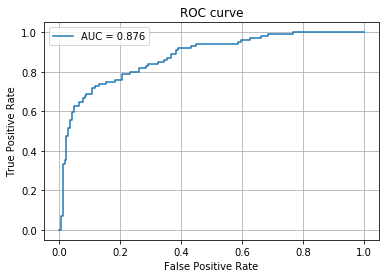

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print('accuracy:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       169
           1       0.80      0.71      0.75        99

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



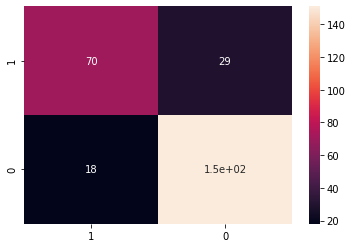

In [109]:
classes = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=classes)

cmdf = pd.DataFrame(cm, index=classes, columns=classes)

sns.heatmap(cmdf, annot=True)
print(classification_report(y_test, y_pred))

In [110]:
X_submit = X_total[train_rows:]
X_submit = std.fit_transform(X_submit)

print(X_train.shape)
print(X_submit.shape)

(623, 2431)
(418, 2431)


In [111]:
y_proba_submit = cls.predict_proba(X_submit)[: , 1]
print(y_proba_submit[:5])

y_pred_submit = cls.predict(X_submit)
print(y_pred_submit[:5])

[0.03037929 0.46396862 0.01864345 0.03188296 0.73397141]
[0 0 0 0 1]


In [112]:
df_submit = pd.DataFrame(y_pred_submit, index=PassengerId, columns=['Survived'])
df_submit.head(10)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [113]:
df_submit.to_csv('titanic_lgb_submit.csv')

Kaggle Score:0.76555

## Light GBM（前処理：categorical_fearure）

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

PassengerId = test['PassengerId']

y = train['Survived']
train = train[[col for col in train.columns if col != 'Survived']]

print('train:',train.shape)
print('test:',test.shape)

X_total = pd.concat([train, test], axis=0)

print('X_total:',X_total.shape)
print('<Before>')
print(X_total.isnull().sum())

X_total.fillna(value=-999, inplace=True)

print('<After>')
print(X_total.isnull().sum())

categorical_feature = [col for col in X_total.columns if X_total[col].dtype == 'object']
print('categorical_feature:', categorical_feature)

for i in categorical_feature:
    X_total[i] = X_total[i].astype("category")

train_rows = train.shape[0]
X = X_total[:train_rows]

print('X:', X.shape)
print('y:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

print('<dtype list>')
for i in X.columns:
    print('{}: {}'.format(i, X[i].dtype))

params = {
"random_state": 42
}

cls = lgb.LGBMClassifier(**params)
cls.fit(X_train, y_train, categorical_feature = categorical_feature)

y_pred = cls.predict(X_test)
print(y_pred[:5])

y_proba = cls.predict_proba(X_test)[: , 1]
print(y_proba[:5])

print('accuracy:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

X_submit = X_total[train_rows:]

print(X_train.shape)
print(X_submit.shape)

y_proba_submit = cls.predict_proba(X_submit)[: , 1]
print(y_proba_submit[:5])

y_pred_submit = cls.predict(X_submit)
print(y_pred_submit[:5])

df_submit = pd.DataFrame(y_pred_submit, index=PassengerId, columns=['Survived'])

df_submit.to_csv('titanic_lgb2_submit.csv')

df_submit.head(10)

train: (891, 11)
test: (418, 11)
X_total: (1309, 11)
<Before>
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
<After>
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
categorical_feature: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
X: (891, 11)
y: (891,)
X_train: (623, 11)
y_train: (623,)
X_test: (268, 11)
y_test: (268,)
<dtype list>
PassengerId: int64
Pclass: int64
Name: category
Sex: category
Age: float64
SibSp: int64
Parch: int64
Ticket: category
Fare: float64
Cabin: category
Embarked: category
[1 0 1 1 0]


C:\Users\Owner\anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[0.99841197 0.18726297 0.99143468 0.99344459 0.06793765]
accuracy: 0.8022388059701493
f1_score: 0.7225130890052355
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       162
           1       0.81      0.65      0.72       106

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

(623, 11)
(418, 11)
[0.0058254  0.0698048  0.03473939 0.01228077 0.73881889]
[0 0 0 0 1]


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,0
899,0
900,1


Kaggle Score:0.77751

One-Hot-Encodingで前処理をするよりも、Light GBMでcategorical_featureを処理した方がスコアが高い。

### 参考文献

Python: LightGBM を使ってみる：https://blog.amedama.jp/entry/2018/05/01/081842<br>
LightGBMのCategorical Featureによって精度が向上するか？:https://qiita.com/sinchir0/items/b038757e578b790ec96a